In [1]:
from stanfordcorenlp import StanfordCoreNLP
nlp = StanfordCoreNLP(r'../data/stanford-corenlp-full-2018-02-27', memory='8g',timeout=3000)

In [2]:
sentence = "I saw a big red dog stand there."

In [3]:
from nltk import Tree
import nltk
from functools import reduce

def binarize(tree):
    """
    Recursively turn a tree into a binary tree.
    """
    if isinstance(tree, str):
        return tree
    elif len(tree) == 1:
        return binarize(tree[0])
    else:
        label = tree.label()
        return reduce(lambda x, y: Tree(label, (binarize(x), binarize(y))), tree)

In [4]:
parse_tree = nlp.parse(sentence)

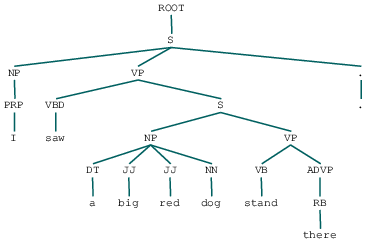

In [5]:
nltk_tree = Tree.fromstring(parse_tree)
nltk_tree

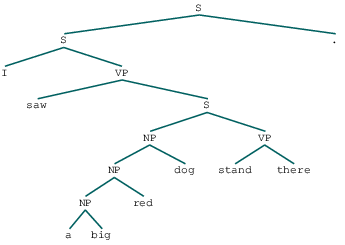

In [6]:
b_tree = binarize(nltk_tree)
b_tree

In [21]:
words = b_tree.leaves()
vocab = {w:i for i, w in enumerate(words)}

In [23]:
nodes = []
def traverse_tree(tree):
    nodes.append(tree.label())
    for subtree in tree:
        if type(subtree) == nltk.tree.Tree:
            traverse_tree(subtree)
        else:
            print(subtree)

traverse_tree(b_tree)

I
Always
ask
the
bartender
for
the
SEASONAL
beer
!


In [24]:
nodes

['S', 'S', 'S', 'VP', 'NP', 'NP', 'PP', 'NP', 'NP']

In [11]:
from __future__ import division
from data_reader_general import *
from configs.config_crf_glove import config
from Layer import GloveMaskCat
import pickle
import numpy as np
import codecs
import copy
import os
from torch import optim
cat_layer = GloveMaskCat(config)

In [12]:
dr = data_reader(config)
train_data = dr.load_data(config.data_path+'Restaurants_Train_v2.xml.pkl')
test_data = dr.load_data(config.data_path+'Restaurants_Test_Gold.xml.pkl')
dg_train = data_generator(config, train_data, False)
dg_test =data_generator(config, test_data, False)

In [13]:
dg_train = data_generator(config, train_data)
dg_test =data_generator(config, test_data, False)

In [14]:
labels = [item[2] for item in train_data]
np.unique(labels, return_counts=True)

(array([0, 1, 2]), array([2164,  633,  805]))

In [19]:
trees = []
import re
with open('data/test_tree.txt', 'w') as f:
    for item in test_data:
        parse_tree = nlp.parse(item[4])
        nltk_tree = Tree.fromstring(parse_tree)
        b_tree = binarize(nltk_tree)
        line = str(b_tree)
        line = re.sub('\n', ' ', line)
        line = ' '.join(line.split())
        f.write(line+'||' + str(item[2])+'||'+' '.join(item[5])+'\n')

In [61]:
sent_vecs, mask_vecs, label_list, sent_lens, texts, targets = next(dg_train.get_ids_samples())